<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Cardiovascular_classification/blob/main/CardioVascular_Classification_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

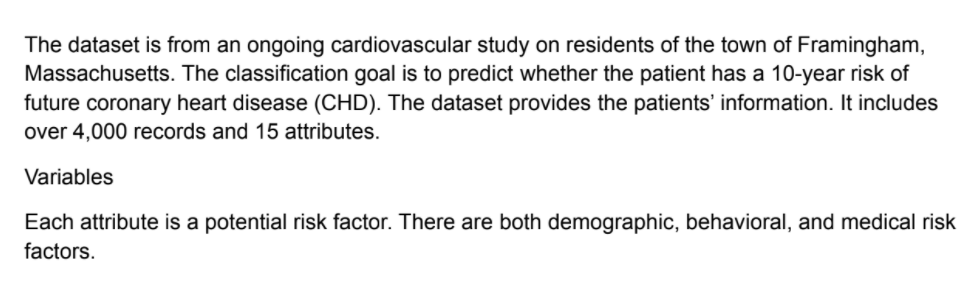

Data Description
Demographic:
- Sex: male or female("M" or "F")
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
- is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
Predict variable (desired target)
- 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV





###Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


###Data Check

In [5]:
df.shape

(3390, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#Data Cleaning

we can see some columns which have null values 

'education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose' columns has null values which we will have to deal with 

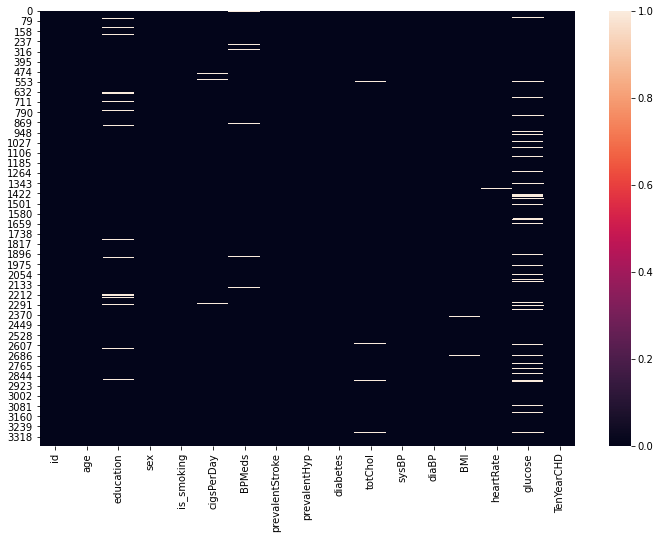

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

this heatmap gives the idea , of null values in the Data

We can use imputation of the missing values in detail , when we do feature engg later, where we will look into each features null value in detail

In [9]:
print(df.columns)
cat_columns=['education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


#EDA

##Univariate

In [10]:
num_cat=['age', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

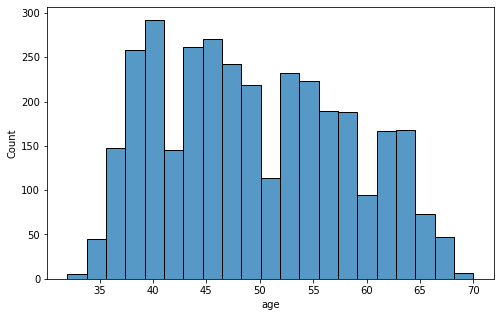

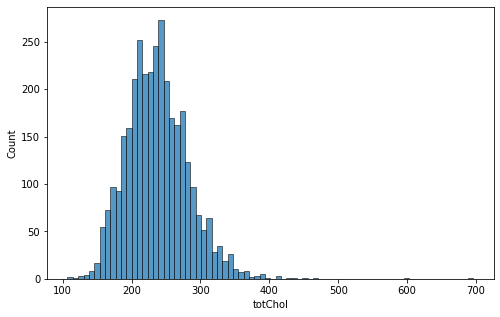

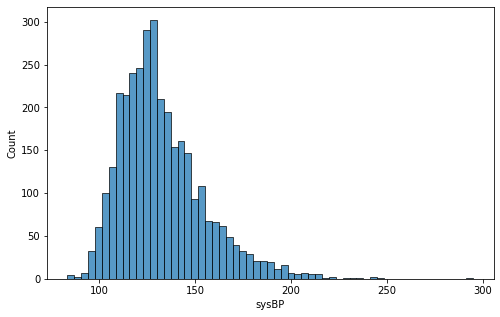

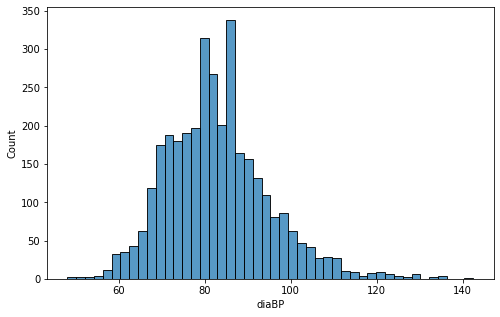

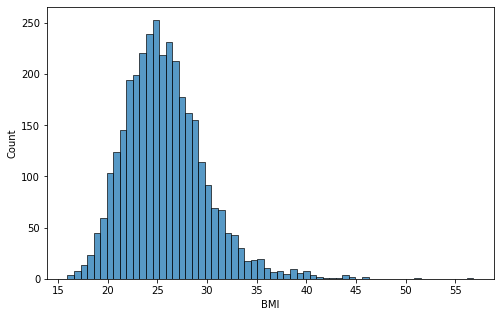

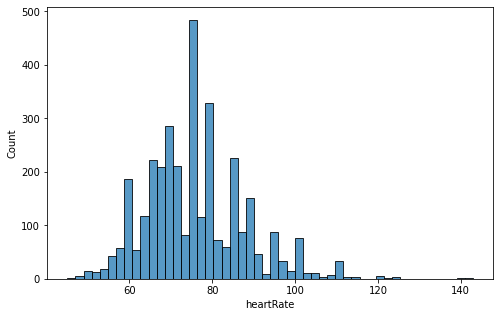

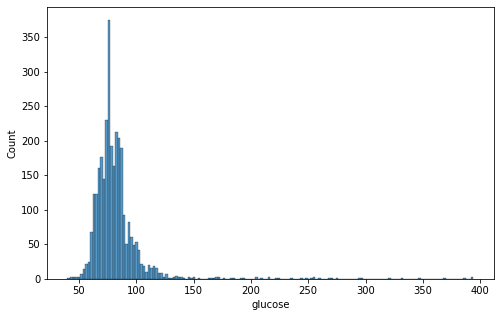

In [11]:
for i in num_cat:
  plt.figure(figsize=(8,5))
  sns.histplot(df[i])

The distribution of the seems normal, but also right skewed, so we can use transformation techniques like log tranformation to deal with skewness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

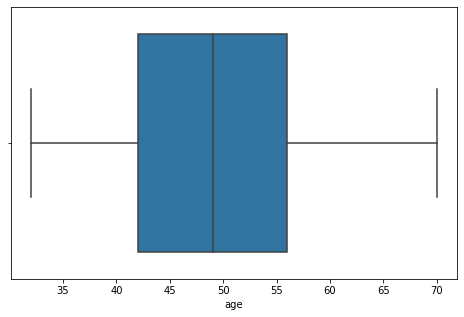

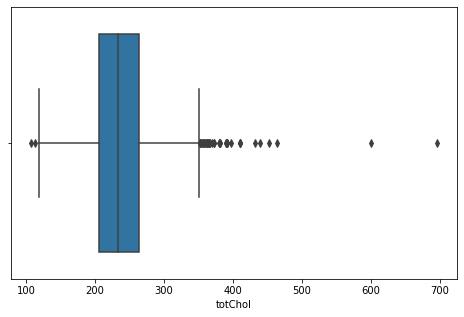

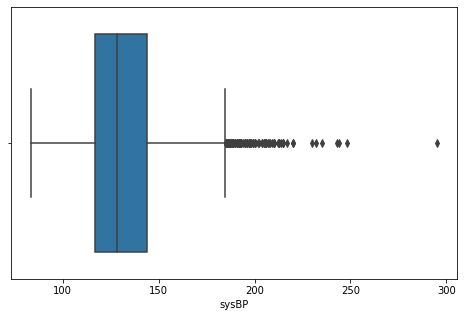

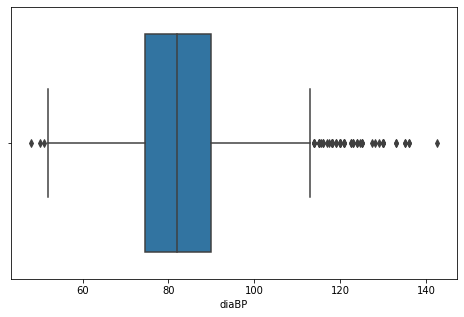

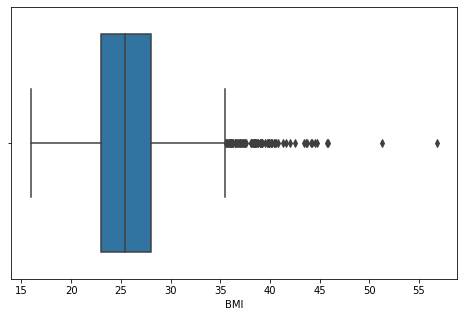

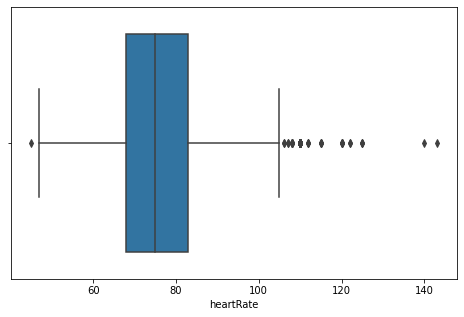

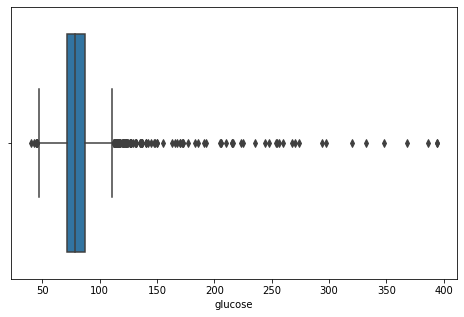

In [129]:
for i in num_cat:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[i])

From our standard approach , we classify the any point as outliers if :

- its characteristic is very different from the other points in same field 
- its occurence is rare.

and generally we say that the points which are outiside the whiskers  of boxplot are classified as outliers , but here we see in most plots , the range of the data is as such classifying out of the whisker points as outliers does not seems to be a viable options.

So we will keep the values as of now , and later we can try training the model without these points

##Bi - Variate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

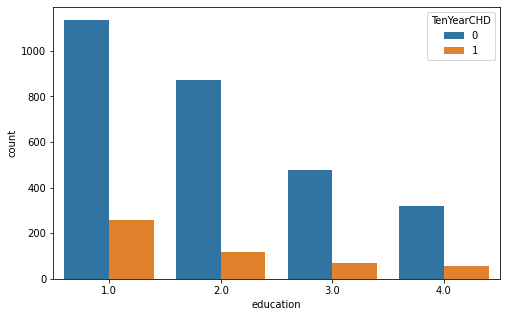

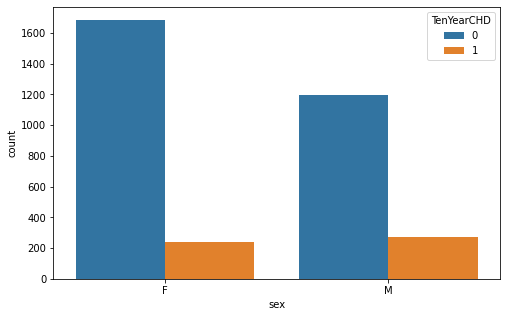

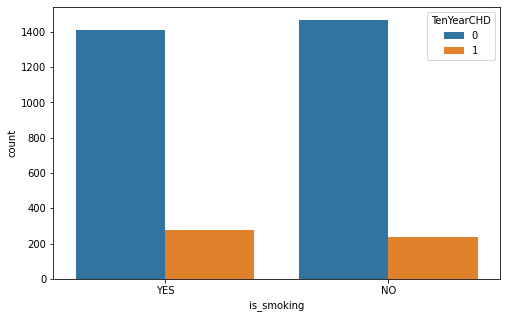

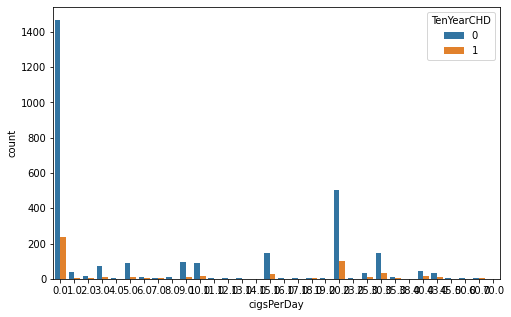

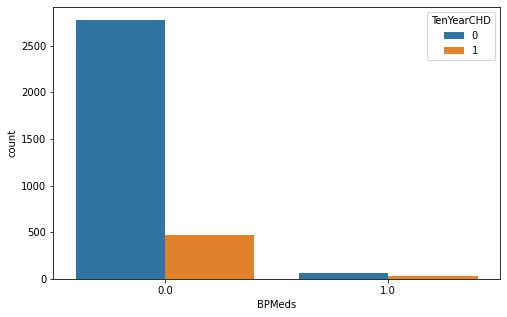

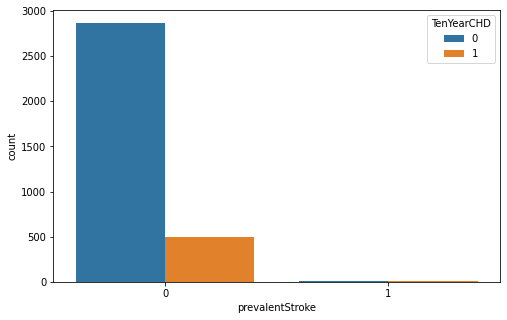

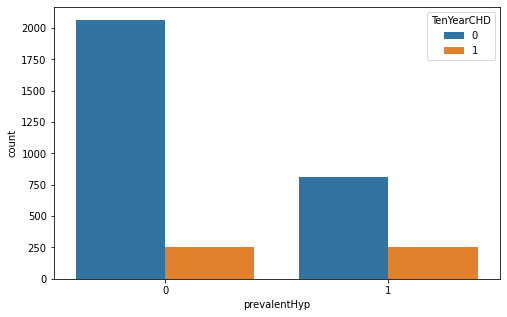

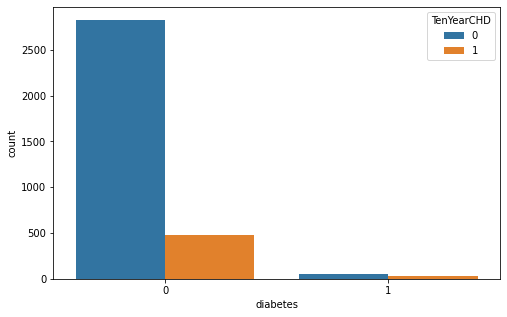

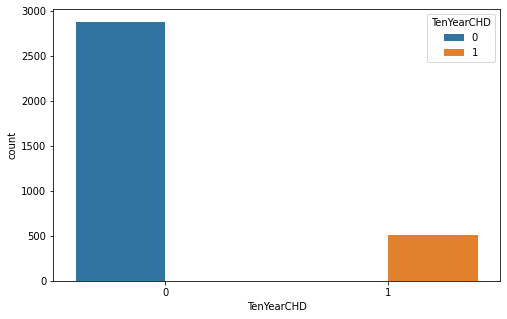

In [130]:
for i in cat_columns:
  plt.figure(figsize=(8,5))
  sns.countplot(df[i],hue=df['TenYearCHD'])

from here we can say that , 
distribution of both the category is random in each feature , so we can not take any descision of dropping the columns as of now

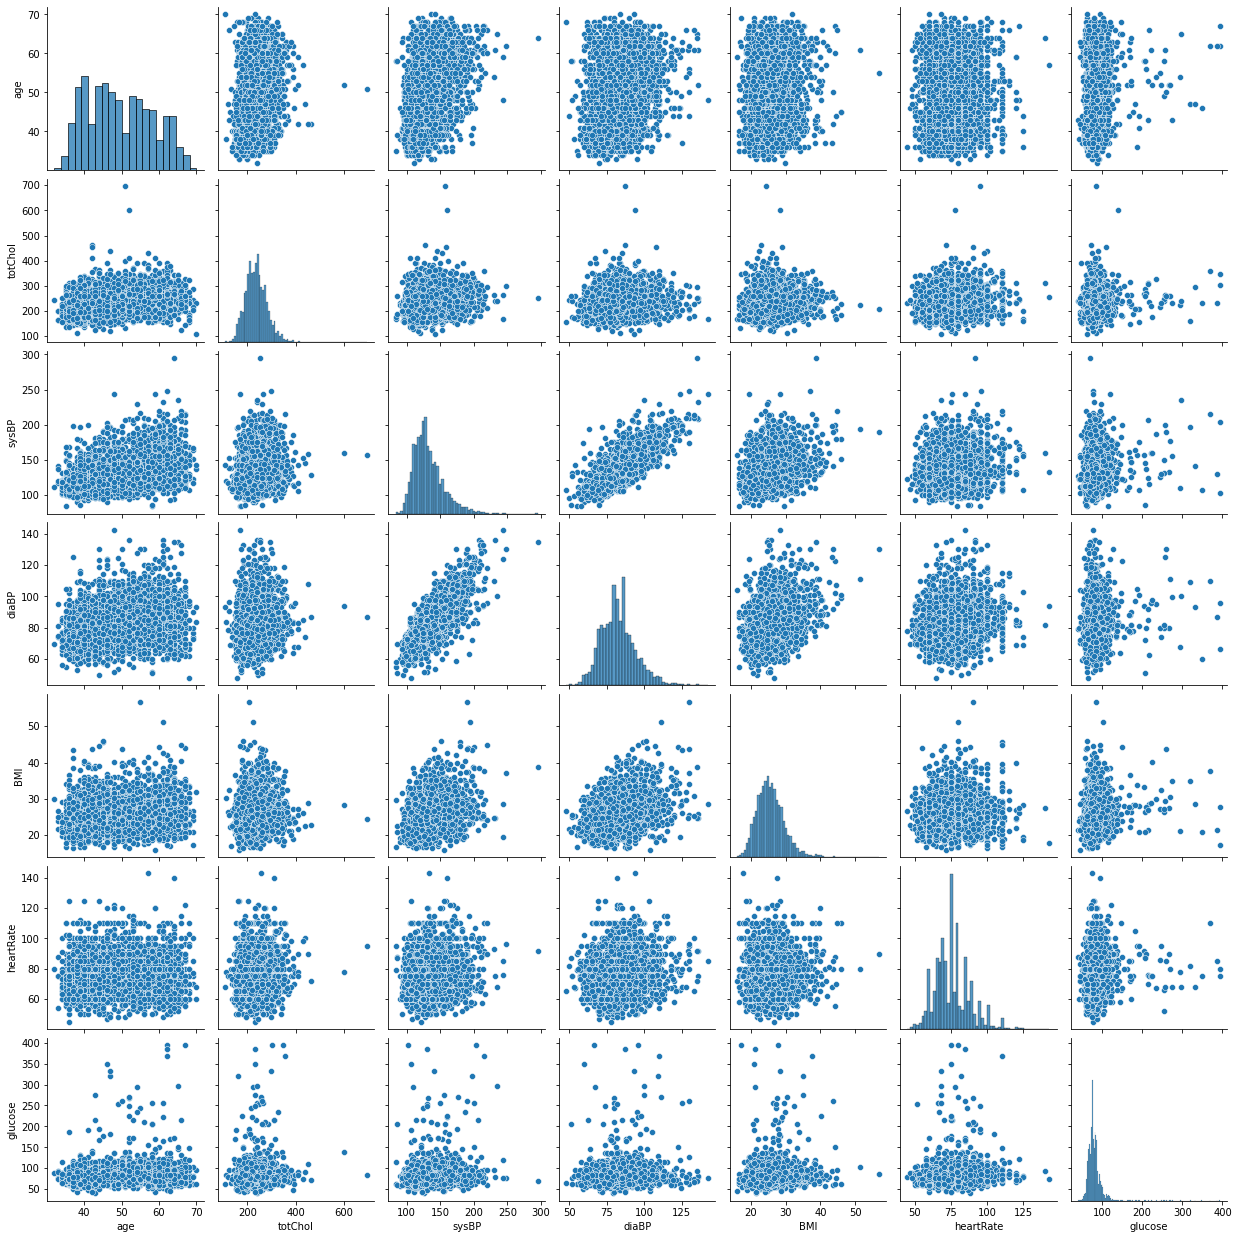

In [131]:
sns.pairplot(df[num_cat])

- in some field like sysbp and dia bp we see a linear relationship
- not much pattern can be seen in the other numerical field.



##MultiVariate

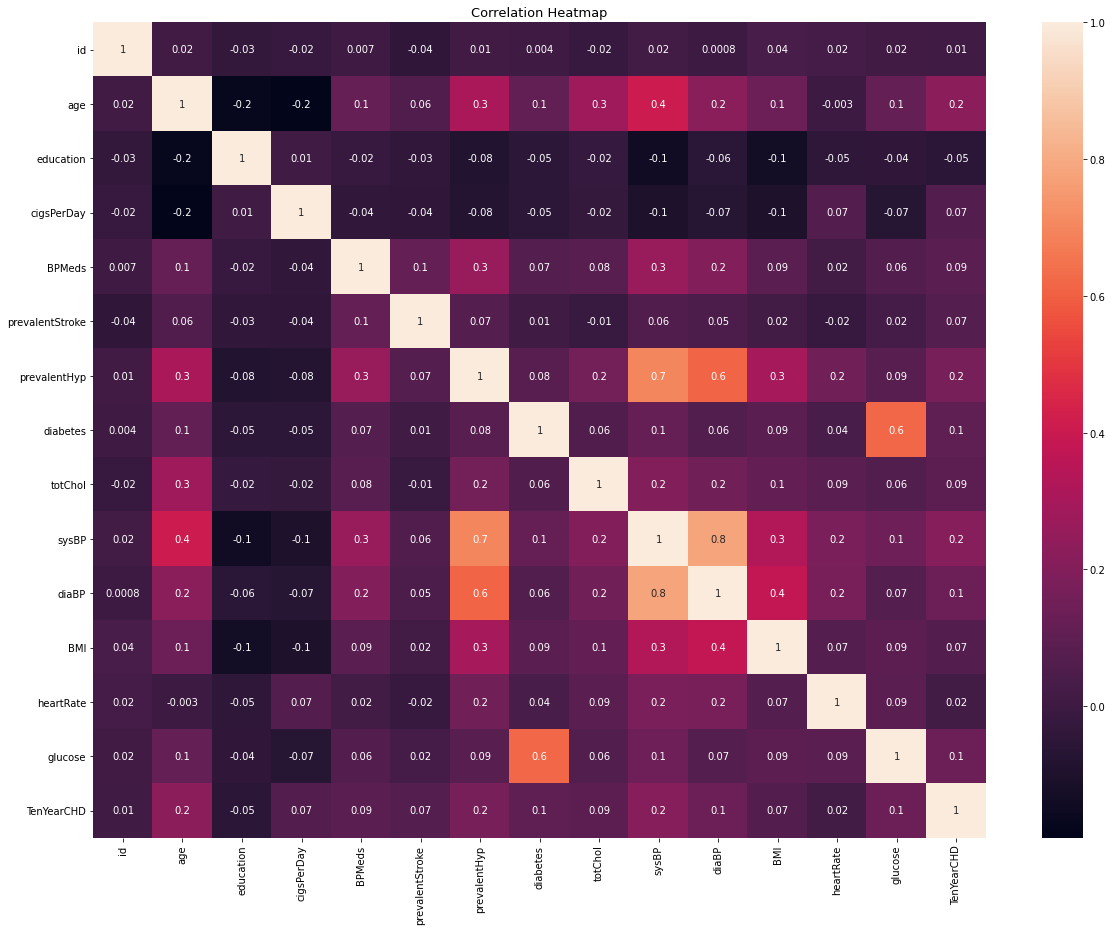

In [132]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, fmt='.1g')
plt.title('Correlation Heatmap', fontsize=13)
plt.show()

#Data Preprocessing

##Handling Missing values

For now lets take it as a continous variable and the target variable is randomly distributed among diff ages

'education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose'


All these columns has null values , as we are not facing much outliers effect , and distribution is normal we can impute the missing values with mode/median values.
mode for catrgorical columns
median for numerical columns

In [12]:
nulls=[]
for i in df.columns:
  nul=df[i].isnull().sum()
  nulls.append(nul)


In [14]:
pd.DataFrame({'columns':df.columns,'missing values':nulls})

,columns,missing values
0,id,0
1,age,0
2,education,87
3,sex,0
4,is_smoking,0
5,cigsPerDay,22
6,BPMeds,44
7,prevalentStroke,0
8,prevalentHyp,0
9,diabetes,0


####Education

In [133]:
print(df[df['education'].isnull()].shape)
df['education'].fillna(1,inplace=True)

(87, 17)


####"cigsPerDay"

In [134]:
print(df[df['cigsPerDay'].isnull()].shape)
df['cigsPerDay'].fillna(10,inplace=True)

(22, 17)


####'BPMeds'

In [135]:
print(df[df['BPMeds'].isnull()].shape)
df['BPMeds'].fillna(0,inplace=True)

(44, 17)


####'totChol

In [136]:
print(df[df['totChol'].isnull()].shape)
df['totChol'].fillna(234,inplace=True)

(38, 17)


####'BMI' , Heartrate , glucose

In [137]:
df['BMI'].fillna(25,inplace=True)
df['heartRate'].fillna(75,inplace=True)
df['glucose'].fillna(82,inplace=True)

Now to data is free from null values!

After this we get a non null dataset!

##Creating Bins for Cigsperday

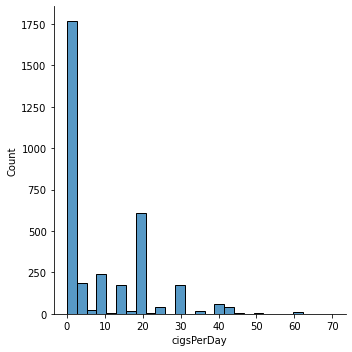

In [138]:
sns.displot(df.cigsPerDay)

In [139]:
df[df.cigsPerDay==0]['TenYearCHD'].value_counts()

0    1467
1     236
Name: TenYearCHD, dtype: int64

In [140]:
df[(df.cigsPerDay<=20)&(df.cigsPerDay>0)]['TenYearCHD'].value_counts()

0    1125
1     198
Name: TenYearCHD, dtype: int64

In [141]:
df[(df.cigsPerDay>20)]['TenYearCHD'].value_counts()

0    287
1     77
Name: TenYearCHD, dtype: int64

so from here we can see there can be three categories in cigs per day , as the ratio of target varible get changed .
So we see that , the all over ratio in target variable is 1:6 but for cigg per day greater than equal to 20 it is around 1:3 that is double to get a attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


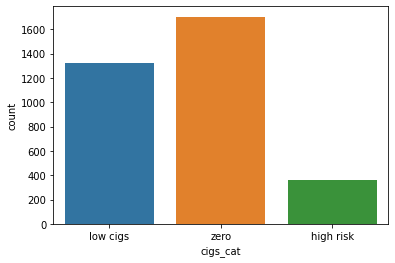

In [142]:
def cig_cat(x):
  if x==0:
    return "zero"
  elif x>0 and x<=20:
    return "low cigs"
  elif x>20:
    return "high risk"
df['cigs_cat']=df.cigsPerDay.apply(cig_cat)
sns.countplot(df['cigs_cat'])

##Doing Log tranformation on skewed data

In [143]:
for i in  ['glucose','heartRate','BMI','totChol','sysBP']:
  df[i]=np.log(df[i])

In [144]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigs_cat
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.218876,4.499810,4.382027,1,low cigs
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,zero
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,low cigs
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,low cigs
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,high risk


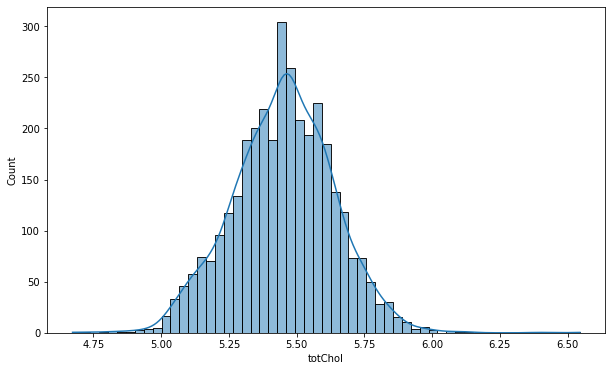

In [145]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='totChol', kde=True)
plt.show()

##One Hot encoding on categorical features

In [146]:
df=pd.get_dummies(df, columns=['sex','is_smoking','cigs_cat'],drop_first=True)
df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES,cigs_cat_low cigs,cigs_cat_zero
0,0,64,2.0,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.218876,4.499810,4.382027,1,0,1,1,0
1,1,36,4.0,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,1,0,0,1
2,2,46,1.0,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,0,1,1,0
3,3,50,1.0,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,1,1,1,0
4,4,64,1.0,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,0,1,0,0


##Preparing Data for Modelling

In [147]:
X=df.drop(['id','TenYearCHD','cigsPerDay'],axis=1)
y=df['TenYearCHD']

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   BPMeds             3390 non-null   float64
 3   prevalentStroke    3390 non-null   int64  
 4   prevalentHyp       3390 non-null   int64  
 5   diabetes           3390 non-null   int64  
 6   totChol            3390 non-null   float64
 7   sysBP              3390 non-null   float64
 8   diaBP              3390 non-null   float64
 9   BMI                3390 non-null   float64
 10  heartRate          3390 non-null   float64
 11  glucose            3390 non-null   float64
 12  sex_M              3390 non-null   uint8  
 13  is_smoking_YES     3390 non-null   uint8  
 14  cigs_cat_low cigs  3390 non-null   uint8  
 15  cigs_cat_zero      3390 non-null   uint8  
dtypes: float64(8), int64(4),

In [149]:
print(X.shape)
print(y.shape)

(3390, 16)
(3390,)


###Splitting our Data

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [151]:
print(X_train.shape)
print(X_test.shape)

(2542, 16)
(848, 16)


the stratify= y parameter gives us the stratified sampling , ie ratio of both the classes remain same in our sampled train and test data

###Scaling the data

In [152]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

###Handling class imbalance

we wil try using both SMOTE Technnique and using class weights for handling imbalance in the data

In [153]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y_train))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

{0: 2159, 1: 383} {0: 2158, 1: 1727}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Modelling

##Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score
eval=pd.DataFrame()

In [161]:
def Logistic_model(x_tr,y_tr,x_te,y_te):
   
  #model 

  from sklearn.linear_model import LogisticRegression
  class_weight = {0: 1,
                1: 6}
  model=LogisticRegression(class_weight=class_weight)
  model.fit(x_tr,y_tr)
  model.get_params
  #testing on Recall score
  y_train_pred=model.predict(x_tr)
  #print(classification_report(y_tr,y_train_pred))
  y_pred=model.predict(x_te)
  #print(classification_report(y_te,y_pred))
  from sklearn.metrics import recall_score
  #print(f'Recall score for train data using Logistic with Class weights : {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using Logistic with Class Weights : {recall_score(y_te,y_pred)}')
  
  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=y_te,y_pred


  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_tr)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_te)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print(accuracy_score(y_te,y_pred))

  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'Logistic','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation

Logistic_model(X_train,y_train,X_test,y_test)

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,Logistic,0.66247,0.628538,0.718016,0.679688,0.736685,0.712142


We see that even dealing with class imbalance , we are not getting significant result with Recall score

""


##SVM

In [156]:
def svm_model(x_train,y_tr,x_test,y_te):

  #model

  from sklearn import svm
  from sklearn.model_selection import GridSearchCV 
  model= svm.SVC(class_weight=class_weight,probability=True)
  model.fit(x_train,y_tr)
  
  #testing for recall
  y_train_pred=model.predict(x_train)
  print(classification_report(y_tr,y_train_pred))
  y_pred=model.predict(x_test)
  print(classification_report(y_te,y_pred))
  print(f'Recall score for train data using SVM : {recall_score(y_tr,y_train_pred)}')
  print(f'Recall score for test data using SVM : {recall_score(y_te,y_pred)}')
  

  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_train)
  print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))


svm_model(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      2159
           1       0.36      0.80      0.49       383

    accuracy                           0.75      2542
   macro avg       0.66      0.77      0.67      2542
weighted avg       0.87      0.75      0.78      2542

              precision    recall  f1-score   support

           0       0.89      0.70      0.79       720
           1       0.24      0.53      0.33       128

    accuracy                           0.68       848
   macro avg       0.57      0.62      0.56       848
weighted avg       0.80      0.68      0.72       848

Recall score for train data using SVM : 0.804177545691906
Recall score for test data using SVM : 0.53125
RF train roc-auc: 0.847990741289423
RF test roc-auc: 0.6672743055555554
Accuracy score :0.6757075471698113


but still we se a less score on the test set, meaning that our model is getting  overfitted . As in SVM here train recal score is good but test score is not good

##SVM with Cross validation  and HyperParameter tuning

In [157]:
def svm_tuned(x_train,y_tr,x_test,y_te):

  #model 
  from sklearn.model_selection import GridSearchCV 
  from sklearn import svm

  param_dict = {'C': [0.1,1,10],  
              'kernel': ['rbf','poly','linear']} 
  model= svm.SVC(probability=True,class_weight=class_weight)
  grid = GridSearchCV(model, param_dict,n_jobs=2,cv=5, verbose = 10,scoring='recall') 
  grid.fit(x_train,y_tr)
  print(model.get_params)

  #testing for Recall

  y_train_pred=grid.predict(x_train)
  #print(classification_report(y_tr,y_train_pred))
  y_pred=grid.predict(x_test)
  #print(classification_report(y_te,y_pred))
  from sklearn.metrics import recall_score,accuracy_score,roc_auc_score,roc_curve
  #print(f'Recall score for train data using SVM with CV and tuning : {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using SVM with CV and tuning : {recall_score(y_te,y_pred)}')

  ##testing for ROC-AUC 
  ytrain_pred = grid.predict_proba(x_train)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = grid.predict_proba(x_test)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))
  
  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'SVM','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation

svm_tuned(X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   21.4s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   29.9s
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:   59.4s finished


<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1, 1: 6},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,SVM,0.654209,0.627358,0.710183,0.6875,0.735751,0.711979


##XGB without using Tuning

In [158]:
def xgb_model(x_train,y_tr,x_test,y_te):

  from xgboost import XGBClassifier
  model=XGBClassifier(scale_pos_weight=6)
  model.fit(x_train,y_tr)

  y_train_pred=model.predict(x_train)
  y_pred=model.predict(x_test)
  print(f'Recall score for train data using Xgboost: {recall_score(y_tr,y_train_pred)}')
  print(f'Recall score for test data using Xgboost: {recall_score(y_te,y_pred)}')

  ##testing for ROC-AUC 
  ytrain_pred = model.predict_proba(x_train)
  print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))

xgb_model(X_train,y_train,X_test,y_test)

Recall score for train data using Xgboost: 0.8015665796344648
Recall score for test data using Xgboost: 0.625
RF train roc-auc: 0.856399285521655
RF test roc-auc: 0.6892686631944445
Accuracy score :0.6533018867924528


Again , our Xgboost model performs well in the training set but , does not perform well on the Test set


##XGBoost with hyper parameter tuning

In [166]:
def xgb_tuned(x_train,y_tr,x_test,y_te):
  from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
  from xgboost import XGBClassifier
  space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
          'gamma': hp.uniform ('gamma', 1,9),
          'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
          'reg_lambda' : hp.uniform('reg_lambda', 0,1),
          'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
          'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
          'n_estimators': 180,
          'seed': 0
      }
  def objective(space):
      clf=XGBClassifier(
                      n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                      reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                      colsample_bytree=int(space['colsample_bytree']),scale_pos_weight=8,random_state=22)
      
      
      clf.fit(x_train, y_tr)
      

      pred = clf.predict(x_test)
      #print(pred)
      roc = recall_score(y_te, pred>0.5)
      
      return {'loss': -roc, 'status': STATUS_OK }

  trials = Trials()
  best_hyperparams = fmin(fn = objective,
                          space = space,
                          algo = tpe.suggest,
                          max_evals = 100,
                          trials = trials)
  
  #print("The best hyperparameters are : ","\n")
  print(best_hyperparams)

  model=XGBClassifier(colsample_bytree=best_hyperparams['colsample_bytree'],
                                 gamma=best_hyperparams['gamma'],
                                 max_depth=int(best_hyperparams['max_depth']),
                                 min_child_weight=best_hyperparams['min_child_weight'],
                                 reg_alpha=best_hyperparams['reg_alpha'],
                                 reg_lambda=best_hyperparams['reg_lambda'],random_state=1,scale_pos_weight=8)
  

  model.fit(x_train,y_tr)
  y_train_pred=model.predict(x_train)
  y_pred=model.predict(x_test)

  print(model.get_params)

  #print(f'Recall score for train data using Xgboost with tuning: {recall_score(y_tr,y_train_pred)}')
  #print(f'Recall score for test data using Xgboost with tuning: {recall_score(y_te,y_pred)}')

  ytrain_pred = model.predict_proba(x_train)
  #print('RF train roc-auc: {}'.format(roc_auc_score(y_tr, ytrain_pred[:,1])))
  ytest_pred = model.predict_proba(x_test)
  #print('RF test roc-auc: {}'.format(roc_auc_score(y_te, ytest_pred[:,1])))
  #print('Accuracy score :{}'.format(accuracy_score(y_te,y_pred)))

  train_acc=accuracy_score(y_tr,y_train_pred)
  test_acc=accuracy_score(y_te,y_pred)
  train_recall=recall_score(y_tr,y_train_pred)
  test_recall=recall_score(y_te,y_pred)
  train_roc=roc_auc_score(y_tr, ytrain_pred[:,1])
  test_roc=roc_auc_score(y_te, ytest_pred[:,1])

  evaluation=pd.DataFrame({'Model':'Xg Boost','Train Accuracy':train_acc,'Test Accuracy':test_acc,'Train Recall':train_recall,'Test Recall':test_recall,'Train ROC':train_roc,'Test ROC':test_roc},index=[1])
  return evaluation


xgb_tuned(X_train,y_train,X_test,y_test)



100%|██████████| 100/100 [00:14<00:00,  6.70it/s, best loss: -0.8046875]
{'colsample_bytree': 0.747849580145067, 'gamma': 2.112343338261029, 'max_depth': 12.0, 'min_child_weight': 4.0, 'reg_alpha': 48.0, 'reg_lambda': 0.5248892695258391}
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.747849580145067,
              gamma=2.112343338261029, learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=4.0, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=48.0,
              reg_lambda=0.5248892695258391, scale_pos_weight=8, seed=None,
              silent=None, subsample=1, verbosity=1)>


,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC,Test ROC
1,Xg Boost,0.587726,0.5625,0.83812,0.757812,0.77976,0.692893


##Evaluation

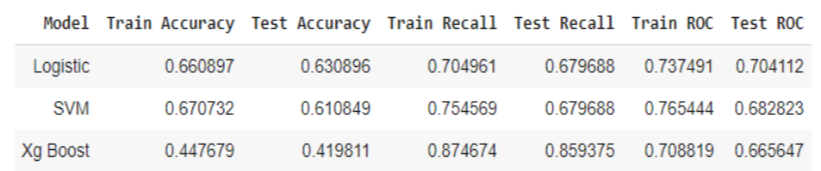

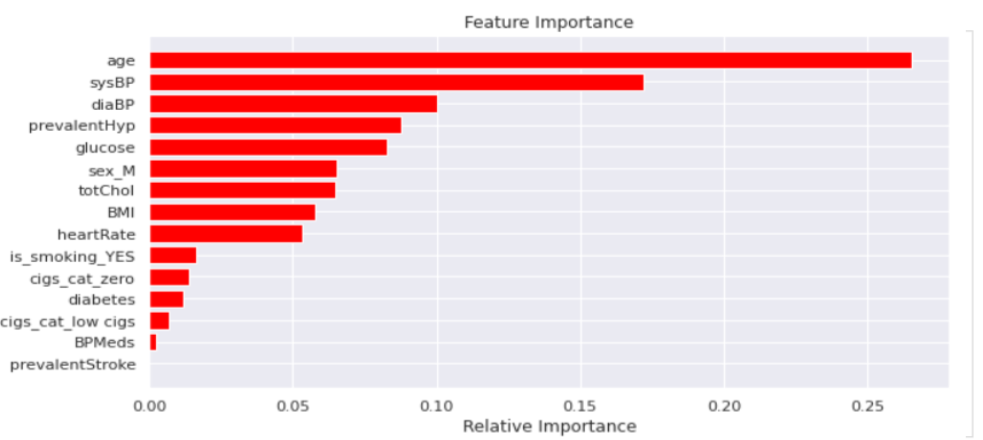

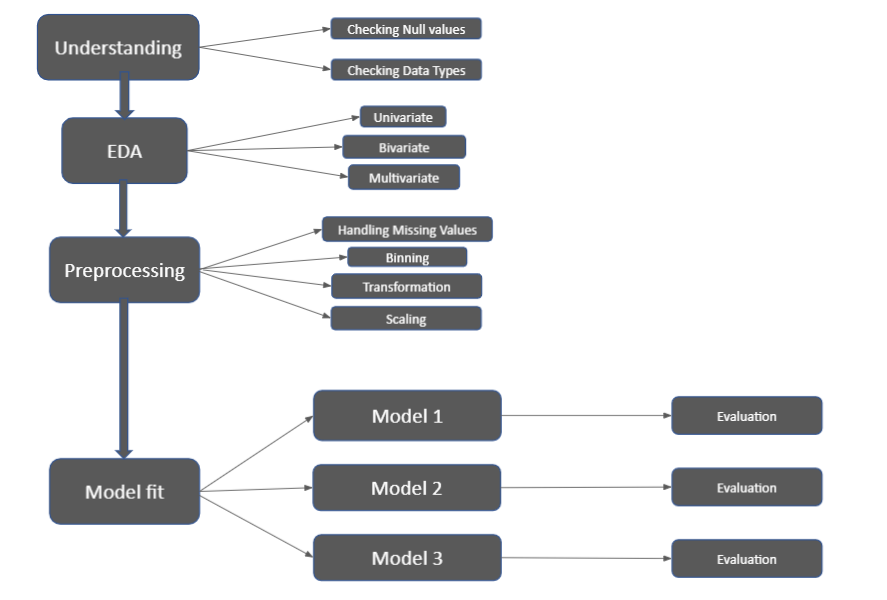

#Summary

- As the first step, we understand the data &  perform some cleaning on the null values and checking the data types and EDA on data. 
-After EDA We divided our project into different model building and preprocessing before model.
-As so we have a high imbalance data set, we used different techniques to balance the data like SMOTE and assign class weights.
-We tried different models and evaluated their performance scores. Models Built: Logistic Regression, SVM, Decision Tree, RandomForest, XGBoost
Based on our targeted evaluation metric - recall, we chose XGBoost as the suggested model
